# Exploratory and cleaning data set


- cleaning and exploring our data set


In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data set 

In [9]:
labels=pd.read_csv('../Data/Train_set_labels.csv')
features=pd.read_csv('../Data/Training_set_values.csv')

# merge the label to the features on id

features= features.merge(labels , on ='id')

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
features.shape

(59400, 41)

###### Data have 59,400 total wells with 41 features

### Lets look each features

#### amount_tsh
  - "Total Static Head." Total Static Head is a measure of the total vertical distance that water can be pumped or lifted from a water source to the discharge point at the waterpoint.
  - having 0 amount_tsh means that if the water level in the well is at the same level as the discharge point, the Total Static Head would be 0

In [12]:
features.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

#### date_recorded

In [13]:
features.date_recorded.dtype

dtype('O')

In [14]:
#cast it in to datetime data type and take only the year
features.date_recorded=pd.to_datetime(features.date_recorded).dt.year
features.date_recorded

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
59395    2013
59396    2011
59397    2011
59398    2011
59399    2011
Name: date_recorded, Length: 59400, dtype: int32

#### funder

replace 0 in the form of unknown

In [15]:
features.funder.replace('0' , 'unknown' ,inplace=True )

#### gps_height

In [16]:
(features.gps_height==0.0).sum()

20438

#### installer

drop this column similar values we have in 

In [17]:
features.installer.replace('0' , 'unknown' , inplace=True)

In [18]:
features.installer.isna().sum()

3655

#### longitude 
invalid entry of 0 for longitude will replace it with null value


In [19]:
(features.longitude==0).sum()

1812

In [20]:
features.loc[features['longitude'] ==0 , 'longitude'] = np.nan

#### latitude

In [21]:
(features.latitude>-1).sum()

1819

In [22]:
features.latitude

0        -9.856322
1        -2.147466
2        -3.821329
3       -11.155298
4        -1.825359
           ...    
59395    -3.253847
59396    -9.070629
59397    -8.750434
59398    -6.378573
59399    -6.747464
Name: latitude, Length: 59400, dtype: float64

#### wpt_name

In [23]:
features.wpt_name.isna().sum()

2

In [24]:
features.wpt_name

0                        none
1                    Zahanati
2                 Kwa Mahundi
3        Zahanati Ya Nanyumbu
4                     Shuleni
                 ...         
59395     Area Three Namba 27
59396       Kwa Yahona Kuvala
59397                 Mashine
59398                  Mshoro
59399         Kwa Mzee Lugawa
Name: wpt_name, Length: 59400, dtype: object

#### num_ private

In [25]:
features.num_private.value_counts()

num_private
0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: count, Length: 65, dtype: int64

In [26]:
features.num_private.isna().sum()

0

#### basin

In [27]:
features.basin.unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

#### subvillage

In [28]:
features.subvillage.nunique()

19287

#### region and region_code

In [29]:
features.region

0             Iringa
1               Mara
2            Manyara
3             Mtwara
4             Kagera
            ...     
59395    Kilimanjaro
59396         Iringa
59397          Mbeya
59398         Dodoma
59399       Morogoro
Name: region, Length: 59400, dtype: object

In [30]:
#casting it to object so it can be catagorical
features['region_code'] = features['region_code'].astype('O')
features.region_code.dtypes

dtype('O')

#### district_code

In [31]:
features.district_code.head()

0     5
1     2
2     4
3    63
4     1
Name: district_code, dtype: int64

In [32]:
# convert from int to str (Object)
features['district_code'] = features['district_code'].astype('O')
features.district_code.dtypes

dtype('O')

In [33]:
features.district_code.nunique()

20

#### lga

lga is geographical area with dicision with in the country

In [34]:
features.lga.nunique() ,features.lga.unique()

(125,
 array(['Ludewa', 'Serengeti', 'Simanjiro', 'Nanyumbu', 'Karagwe',
        'Mkinga', 'Shinyanga Rural', 'Kahama', 'Tabora Urban', 'Mkuranga',
        'Namtumbo', 'Maswa', 'Siha', 'Meatu', 'Sumbawanga Rural', 'Njombe',
        'Ukerewe', 'Bariadi', 'Same', 'Kigoma Rural', 'Moshi Rural',
        'Lindi Rural', 'Rombo', 'Chamwino', 'Bagamoyo', 'Mafia',
        'Arusha Rural', 'Kyela', 'Kondoa', 'Kilolo', 'Kibondo', 'Makete',
        'Singida Rural', 'Masasi', 'Rungwe', 'Moshi Urban', 'Geita',
        'Mbulu', 'Bukoba Rural', 'Muheza', 'Lushoto', 'Meru', 'Iramba',
        'Kilombero', 'Mbarali', 'Kasulu', 'Bukoba Urban', 'Korogwe',
        'Bukombe', 'Morogoro Rural', 'Kishapu', 'Musoma Rural',
        'Sengerema', 'Iringa Rural', 'Muleba', 'Dodoma Urban', 'Ruangwa',
        'Hanang', 'Misenyi', 'Missungwi', 'Songea Rural', 'Tanga',
        'Tunduru', 'Hai', 'Mwanga', 'Chato', 'Biharamulo', 'Ileje',
        'Mpwapwa', 'Mvomero', 'Bunda', 'Kiteto', 'Longido', 'Urambo',
        'Mbozi'

#### ward

In [35]:
features.ward.nunique()

2092

#### Population

In [36]:
(features.population==0).sum()

21381

#### public meating

In [37]:
features.public_meeting.value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [38]:
features.public_meeting.isna().sum()

3334

#### recorded_by

    all the data entry is recoredded by GeoData Consultants Ltd with no null value

In [39]:
features.recorded_by.value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

In [40]:
features.recorded_by.isna().sum()

0

#### scheme_management

    Who operates the waterpoint

In [41]:
features.scheme_management.nunique() , features.scheme_management.unique()

(11,
 array(['VWC', 'Other', nan, 'Private operator', 'WUG', 'Water Board',
        'WUA', 'Water authority', 'Company', 'Parastatal', 'Trust', 'SWC'],
       dtype=object))

In [42]:
features.scheme_management.isna().sum()

3878

####  scheme_name

will drop this feature

In [43]:
features.scheme_name.unique()

array(['Roman', nan, 'Nyumba ya mungu pipe scheme', ..., 'BL Nsherehehe',
       'Magati  gravity spri', 'Mtawanya'], dtype=object)

In [44]:
features.scheme_name.isna().sum()

28810

#### permit

    if water point is permitted

In [45]:
features.permit.value_counts()

permit
True     38852
False    17492
Name: count, dtype: int64

In [46]:
features.permit.isna().sum()

3056

#### construction_year
    The year the water point was constructed

In [47]:
features.construction_year.dtype

dtype('int64')

In [48]:
features.construction_year

0        1999
1        2010
2        2009
3        1986
4           0
         ... 
59395    1999
59396    1996
59397       0
59398       0
59399    2002
Name: construction_year, Length: 59400, dtype: int64

observed that the mean is biased because of the 0 value

In [49]:
print(features.construction_year.describe())

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64


In [50]:
features.construction_year=(features.construction_year.replace(0 , features.construction_year.median()))

In [51]:
features['construction_year'].describe().T

count    59400.000000
mean      1993.044293
std         11.308410
min       1960.000000
25%       1986.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

create a column named 'age_waterpoint' by subtracting construction_year from date_recorded

In [52]:
features['age_waterpoint']=features.date_recorded - features.construction_year

In [53]:
features.age_waterpoint

0        12
1         3
2         4
3        27
4        25
         ..
59395    14
59396    15
59397    25
59398    25
59399     9
Name: age_waterpoint, Length: 59400, dtype: int64

##### Where the date recorded and construction year are the same, indicating that it was built and recorded at the same time, the age will be zero years.

In [54]:
(features.age_waterpoint<0).sum()

9

In [55]:
#we have 9 negative  age values which we will drop
features = features[features['age_waterpoint'] >= 1]

In [56]:
(features.age_waterpoint==0).sum()

0

In [57]:
features.loc[features['age_waterpoint']== 0, ['date_recorded', 'construction_year']]

,date_recorded,construction_year


#### extraction_type

    The kind of extraction the water point uses

In [58]:
features.extraction_type.nunique() , features.extraction_type.unique()

(18,
 array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
        'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
        'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
        'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object))

In [59]:
features.extraction_type.isna().sum()

0

#### extraction_type_group 
    The kind of extraction the waterpoint uses

In [60]:
features.extraction_type_group.nunique() , features.extraction_type_group.unique()

(13,
 array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
        'other', 'mono', 'wind-powered', 'afridev', 'rope pump',
        'india mark iii', 'other handpump', 'other motorpump'],
       dtype=object))

In [61]:
features.extraction_type_group.isna().sum()

0

#### extraction_type_class
    The kind of extraction the waterpoint uses
        -extraction type class and extraction_type_group are the same so lets drop the group

In [62]:
features.extraction_type_group.unique() == features.extraction_type_group.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

#### management and management_group 
     How the waterpoint is managed
     where scheme_management feature and the management are pretty similar we will drop scheme_management because of 3,872      null value

In [63]:
features.management.nunique() , features.management.unique()

(12,
 array(['vwc', 'wug', 'other', 'water board', 'wua', 'company',
        'private operator', 'water authority', 'parastatal', 'unknown',
        'other - school', 'trust'], dtype=object))

In [64]:
features.scheme_management.unique()

array(['VWC', 'Other', nan, 'WUG', 'Water Board', 'WUA',
       'Water authority', 'Company', 'Private operator', 'Parastatal',
       'Trust', 'SWC'], dtype=object)

In [65]:
features.management_group.nunique() , features.management_group.unique()

(5,
 array(['user-group', 'other', 'commercial', 'parastatal', 'unknown'],
       dtype=object))

In [66]:
features.scheme_management.isna().sum()

3820

In [67]:
(features.management_group=='unknown').sum()

547

#### payment and payment_type
 What the water costs 
 Both have similar values so we will drop paymen column

In [68]:
features.payment.value_counts()

payment
never pay                25176
pay per bucket            8886
pay monthly               8202
unknown                   8018
pay when scheme fails     3860
pay annually              3612
other                     1049
Name: count, dtype: int64

In [69]:
features.payment_type.value_counts()

payment_type
never pay     25176
per bucket     8886
monthly        8202
unknown        8018
on failure     3860
annually       3612
other          1049
Name: count, dtype: int64

#### water_quality  and quality_group 
    The quality of the water
    We will drop the 'quality_group' column in cases where two values are missing, as these instances exhibit similarities with the 'water_quality' column. Therefore, we will rely on the information provided by the 'water_quality' column instead.

In [70]:
features.water_quality.nunique() ,features.water_quality.value_counts()

(8,
 water_quality
 soft                  50304
 salty                  4823
 unknown                1836
 milky                   802
 coloured                485
 salty abandoned         337
 fluoride                199
 fluoride abandoned       17
 Name: count, dtype: int64)

In [71]:
features.quality_group.nunique() , features.quality_group.value_counts()

(6,
 quality_group
 good        50304
 salty        5160
 unknown      1836
 milky         802
 colored       485
 fluoride      216
 Name: count, dtype: int64)

#### quantity and quantity_group 
     The quantity of water
     We will drop the 'quantity_group' column when both features contain comparable values.

In [72]:
features.quantity.value_counts()

quantity
enough          32763
insufficient    15046
dry              6212
seasonal         4029
unknown           753
Name: count, dtype: int64

In [73]:
features.quantity_group.value_counts()

quantity_group
enough          32763
insufficient    15046
dry              6212
seasonal         4029
unknown           753
Name: count, dtype: int64

#### source , source_type and source_class
    The source of the water
    We will drop the 'source_type' column when both features contain comparable values. 'source' is more detailed and 'source_class' is generalized with two classes.

In [74]:
features.source.value_counts()

source
spring                  16834
shallow well            16740
machine dbh             10958
river                    9464
rainwater harvesting     2249
hand dtw                  872
lake                      759
dam                       654
other                     207
unknown                    66
Name: count, dtype: int64

In [75]:
features.source_type.value_counts()

source_type
spring                  16834
shallow well            16740
borehole                11830
river/lake              10223
rainwater harvesting     2249
dam                       654
other                     273
Name: count, dtype: int64

In [76]:
features.source_class.value_counts()

source_class
groundwater    45404
surface        13126
unknown          273
Name: count, dtype: int64

#### waterpoint_type and waterpoint_type_group 
    The kind of waterpoint
    We will drop the 'waterpoint_type_group' column, which has fewer values, when both features contain comparable values.
    

In [77]:
features.waterpoint_type.value_counts()

waterpoint_type
communal standpipe             28166
hand pump                      17395
other                           6311
communal standpipe multiple     6033
improved spring                  775
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [78]:
features.waterpoint_type_group.value_counts()

waterpoint_type_group
communal standpipe    34199
hand pump             17395
other                  6311
improved spring         775
cattle trough           116
dam                       7
Name: count, dtype: int64

#### Status_group

    which is our target

In [79]:
features.status_group.value_counts()

status_group
functional                 31842
non functional             22655
functional needs repair     4306
Name: count, dtype: int64

### Drop columns we don't use for modeling
    - id
    - date_recorded
    - construction_year
    - wpt_name
    - subvillage
    - region 
    - ward
    - recorded_by
    - extraction_type_group
    - scheme_management
    - management_group
    - uantity_group
    - quality_group
    - source_type
    - waterpoint_type_group
    - scheme_name
    - installer 


In [80]:
#drop columns we will not use for modeling
columns_to_drop=['id','date_recorded','construction_year','wpt_name','installer','subvillage','scheme_name','region' ,'ward','recorded_by','extraction_type_group','scheme_management','management_group','payment','quantity_group','quality_group','source_type','waterpoint_type_group']
features=features.drop(columns_to_drop, axis=1)

Let's drop null values. I acknowledge that I may lose valuable data, but my computer's capacity is not sufficient for handling it.

In [81]:
features=features.dropna(axis=0)

In [82]:
features.shape

(50142, 24)

# EDA

In [83]:
features.columns

Index(['amount_tsh', 'funder', 'gps_height', 'longitude', 'latitude',
       'num_private', 'basin', 'region_code', 'district_code', 'lga',
       'population', 'public_meeting', 'permit', 'extraction_type',
       'extraction_type_class', 'management', 'payment_type', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type', 'status_group',
       'age_waterpoint'],
      dtype='object')

In [97]:
features.shape

(50142, 24)

In [96]:
features.management.unique()

array(['vwc', 'other', 'wug', 'water board', 'wua', 'company',
       'private operator', 'water authority', 'parastatal', 'unknown',
       'other - school', 'trust'], dtype=object)

C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Windows-10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

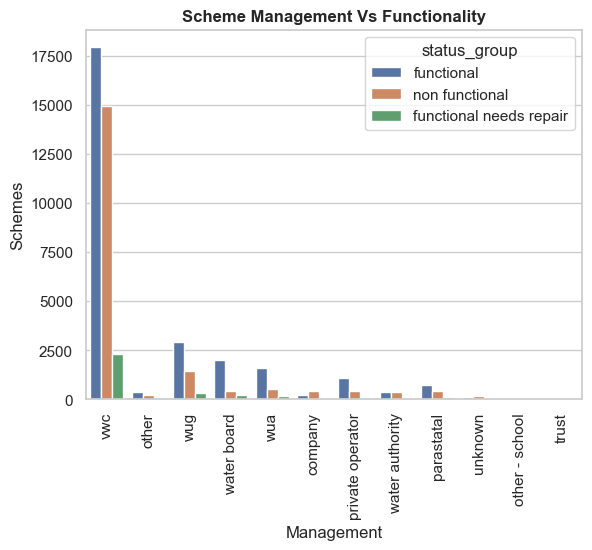

In [94]:
ax = sns.countplot(x='management', hue='status_group', data=features)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
ax.set_xlabel('Management')  # Use set_xlabel instead of plt.xlabel
ax.set_ylabel('Schemes')      # Use set_ylabel instead of plt.ylabel
ax.set_title('Scheme Management Vs Functionality', fontsize=12, fontweight='bold');


In [85]:
features.latitude

0        -9.856322
2        -3.821329
3       -11.155298
4        -1.825359
5        -4.765587
           ...    
59394    -6.124830
59395    -3.253847
59396    -9.070629
59398    -6.378573
59399    -6.747464
Name: latitude, Length: 50142, dtype: float64

In [86]:
features.groupby(['longitude','latitude'])['status_group']

    - filling 0 values in numerical columns with null so we can use simple imputer.exclude age_water point.

In [87]:
numerical_columns = features.select_dtypes(exclude='O').columns
exclude_column = 'age_waterpoint'

numerical_columns = numerical_columns.drop(exclude_column, errors='ignore')

features[numerical_columns] = features[numerical_columns].replace(0, np.nan)

## Export final data ready for modeling 

In [88]:
features.to_csv('../Data/clean_data.csv')